In [1]:
# Aditya Bharadwaj
# kNN algorithm to classify a tumour as malignant (M) or benign (B)
# 32 features of each tumour are used.
# dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [2]:
# parameters
k = 5

In [35]:
# get Breast cancer data
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pd.read_csv(url,  header = None)
X = dataset.iloc[:, 2:12].values
y = dataset.iloc[:, 1].values

In [36]:
print(X.shape)

(569, 10)


In [70]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [71]:
# preprocessing: StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# preprocessing: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Maximum accuracy:- 0.9494202898550724 at K = 7


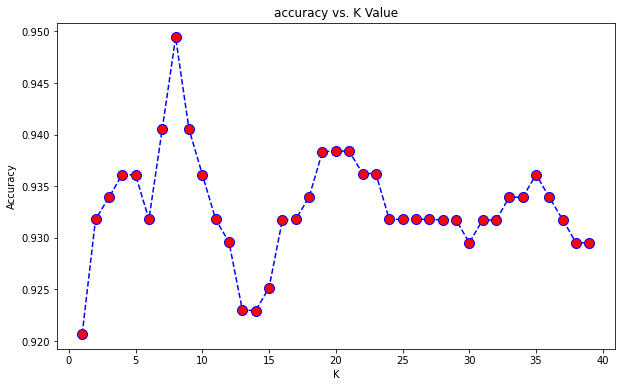

In [72]:
# Cross Validation - Model Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statistics
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, weights='uniform', metric='manhattan')
    scores = cross_val_score(neigh, X_train, y_train, cv=10)
    acc.append(statistics.mean(scores))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


In [22]:
# kNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        76
           M       0.97      0.92      0.95        38

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[75  1]
 [ 3 35]]
